In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd

hello world


In [3]:
import os
import numpy as np
from PIL import Image
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Path to the dataset directory
dataset_path = r"dataset"

# List to store image data and labels
data = []
labels = []

# Set maximum number of images per class
max_images_per_class = 200

# Loop through each folder in the dataset
for class_name in os.listdir(dataset_path):
    class_folder = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_folder):  # Ensure it's a folder
        print(f"Loading images from class: {class_name}")
        class_images = 0
        for image_file in os.listdir(class_folder):
            if class_images >= max_images_per_class:  # Stop after max_images_per_class
                break
            try:
                image_path = os.path.join(class_folder, image_file)
                # Load and process the image
                image = Image.open(image_path).convert("RGB")
                image = image.resize((64, 64))  # Resize to 64x64 for consistency
                image_array = img_to_array(image)  # Convert image to numpy array
                # Append image data and class label
                data.append(image_array)
                labels.append(class_name)
                class_images += 1
            except Exception as e:
                print(f"Error loading image {image_file} from class {class_name}: {e}")

# Convert data and labels to numpy arrays
data = np.array(data)
labels = np.array(labels)

# Normalize the image data to range [0, 1]
data = data.astype("float32") / 255.0

# Convert labels to numerical format using a label encoder
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# One-hot encode the labels for multi-class classification
labels_encoded = to_categorical(labels_encoded)

# Check the final count of images per class
unique, counts = np.unique(labels_encoded, return_counts=True)
class_counts = dict(zip(label_encoder.classes_, counts))
print("Class counts after limiting to 300 images per class:", class_counts)


Loading images from class: bread
Loading images from class: deserts
Loading images from class: drinks
Loading images from class: egg
Loading images from class: fastfoods
Loading images from class: meat
Loading images from class: rawfood
Loading images from class: rice
Loading images from class: soups
Class counts after limiting to 300 images per class: {np.str_('bread'): np.int64(13360), np.str_('deserts'): np.int64(1670)}


In [4]:
from collections import Counter
# Get class counts
class_counts = dict(Counter(labels))

In [5]:
class_counts

{np.str_('bread'): 183,
 np.str_('deserts'): 183,
 np.str_('drinks'): 200,
 np.str_('egg'): 200,
 np.str_('fastfoods'): 140,
 np.str_('meat'): 199,
 np.str_('rawfood'): 199,
 np.str_('rice'): 166,
 np.str_('soups'): 200}

In [6]:
labels

array(['bread', 'bread', 'bread', ..., 'soups', 'soups', 'soups'],
      shape=(1670,), dtype='<U9')

In [7]:
data

array([[[[0.07450981, 0.07843138, 0.05882353],
         [0.07058824, 0.07450981, 0.05882353],
         [0.07058824, 0.07058824, 0.05490196],
         ...,
         [0.07058824, 0.07058824, 0.07058824],
         [0.06666667, 0.06666667, 0.06666667],
         [0.0627451 , 0.0627451 , 0.0627451 ]],

        [[0.07450981, 0.07843138, 0.05882353],
         [0.07450981, 0.07450981, 0.05882353],
         [0.07450981, 0.07450981, 0.05882353],
         ...,
         [0.07058824, 0.07058824, 0.06666667],
         [0.0627451 , 0.0627451 , 0.0627451 ],
         [0.05882353, 0.05882353, 0.05882353]],

        [[0.07450981, 0.07843138, 0.05882353],
         [0.07843138, 0.08235294, 0.0627451 ],
         [0.07843138, 0.08235294, 0.0627451 ],
         ...,
         [0.06666667, 0.06666667, 0.06666667],
         [0.0627451 , 0.0627451 , 0.0627451 ],
         [0.05490196, 0.05490196, 0.05490196]],

        ...,

        [[0.07450981, 0.07450981, 0.07058824],
         [0.07450981, 0.07450981, 0.07058824]

In [8]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [9]:
# Convert labels to numerical format using a label encoder
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# One-hot encode the labels for multi-class classification
labels_encoded = to_categorical(labels_encoded)

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(data, labels_encoded, test_size=0.2, random_state=42)


In [10]:
X_train.shape

(1336, 64, 64, 3)

In [11]:
X_test.shape

(334, 64, 64, 3)

In [12]:
from tensorflow.keras import layers, models

In [13]:
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras.optimizers import Adam

# Define the CNN model
num_classes = labels_encoded.shape[1]
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, 
                    epochs=50, 
                    batch_size=32, 
                    validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")


c:\Users\GANDI ANITHA\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 9s 115ms/step - accuracy: 0.1235 - loss: 4.1393 - val_accuracy: 0.1377 - val_loss: 2.7331
Epoch 2/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - accuracy: 0.1639 - loss: 2.4156 - val_accuracy: 0.2126 - val_loss: 2.1445
Epoch 3/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 116ms/step - accuracy: 0.2111 - loss: 2.1440 - val_accuracy: 0.2485 - val_loss: 1.9819
Epoch 4/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - accuracy: 0.2313 - loss: 2.0363 - val_accuracy: 0.2455 - val_loss: 1.9733
Epoch 5/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - accuracy: 0.2979 - loss: 1.9534 - val_accuracy: 0.3413 - val_loss: 1.8495
Epoch 6/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step - accuracy: 0.3249 - loss: 1.8621 - val_accuracy: 0.3982 - val_loss: 1.7664
Epoch 7/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step - accuracy: 0.3286 - loss: 1.8117 - val_accuracy: 0.3653 - val_loss: 1.7756
Epoch 8/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - accuracy: 0.3900 - loss: 1.7130 - val_accuracy: 0.4

In [17]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step


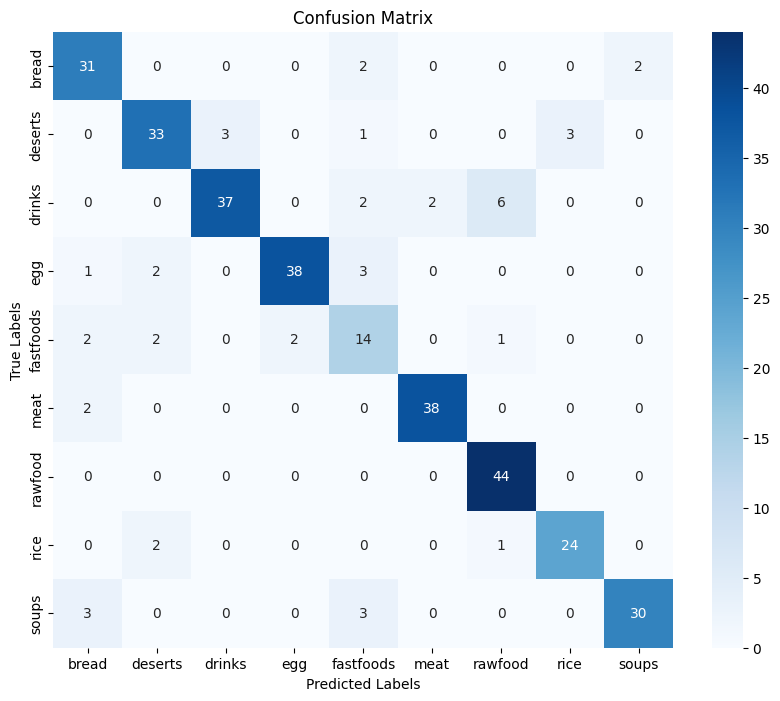

Classification Report:
              precision    recall  f1-score   support

       bread       0.79      0.89      0.84        35
     deserts       0.85      0.82      0.84        40
      drinks       0.93      0.79      0.85        47
         egg       0.95      0.86      0.90        44
   fastfoods       0.56      0.67      0.61        21
        meat       0.95      0.95      0.95        40
     rawfood       0.85      1.00      0.92        44
        rice       0.89      0.89      0.89        27
       soups       0.94      0.83      0.88        36

    accuracy                           0.87       334
   macro avg       0.86      0.86      0.85       334
weighted avg       0.87      0.87      0.87       334



In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Generate predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get the predicted class indices
y_true_classes = np.argmax(y_test, axis=1)  # Get the true class indices

# Compute confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
class_names = label_encoder.classes_

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=class_names))


In [20]:
model.save("food_cnn_model.h5")

In [21]:
import joblib

# Assuming `label_encoder` was used during training
joblib.dump(label_encoder, "label_encoder.pkl")


['label_encoder.pkl']

In [22]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [23]:
import cv2
import numpy as np
from PIL import Image

def calculate_food_area(image):
    # Convert PIL image to NumPy array
    image_array = np.array(image)
    
    # Convert to grayscale
    gray = cv2.cvtColor(image_array, cv2.COLOR_RGB2GRAY)
    
    # Apply thresholding to segment food
    _, binary = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    
    # Find contours of the segmented food
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Calculate area of the largest contour (assume it's the food)
    if contours:
        largest_contour = max(contours, key=cv2.contourArea)
        area_pixels = cv2.contourArea(largest_contour)
    else:
        area_pixels = 0
    
    # Return area in pixels
    return area_pixels


In [24]:
pip install gradio

Note: you may need to restart the kernel to use updated packages.


In [1]:
import gradio as gr
from PIL import Image
import cv2
import numpy as np

def calculate_food_area_and_size(image):
    # Convert PIL image to NumPy array
    image_array = np.array(image)
    
    # Convert to grayscale
    gray = cv2.cvtColor(image_array, cv2.COLOR_RGB2GRAY)
    
    # Apply thresholding to segment food
    _, binary = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    
    # Find contours of the segmented food
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Calculate area of the largest contour (assume it's the food)
    if contours:
        largest_contour = max(contours, key=cv2.contourArea)
        area_pixels = cv2.contourArea(largest_contour)
    else:
        area_pixels = 0
    
    # Estimate size based on the area
    if area_pixels < 10000:
        size = 'small'
    elif area_pixels < 30000:
        size = 'medium'
    else:
        size = 'large'
    
    # Display the segmented image
    segmented_image = cv2.drawContours(image_array.copy(), [largest_contour], -1, (0, 255, 0), 3) if contours else image_array
    
    return area_pixels, size, segmented_image

app = gr.Interface(
    fn=calculate_food_area_and_size,
    inputs=gr.Image(type="pil"),
    outputs=[
        gr.Number(label="Food Area (pixels)"),
        gr.Text(label="Estimated Size"),
        gr.Image(label="Segmented Image")
    ],
    title="Food Area and Size Detection",
    description="Upload an image of food, and the app will calculate the area of the food, estimate its size (small, medium, large), and display the segmented image."
)

app.launch()


* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.


In [ ]:
J

In [26]:
pip install gradio

Note: you may need to restart the kernel to use updated packages.


In [2]:
import gradio as gr
from PIL import Image
import numpy as np
import tensorflow as tf
import joblib

# Load the trained model
model = tf.keras.models.load_model("food_cnn_model.h5")  # Replace with your saved model path

# Load the LabelEncoder
label_encoder = joblib.load("label_encoder.pkl")
class_names = label_encoder.classes_  # Extract the class names

# Preprocessing function
def preprocess_image(image):
    image = image.resize((64, 64))  # Resize to match the model's input shape
    image_array = np.array(image) / 255.0  # Normalize pixel values
    image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension
    return image_array

# Prediction function
def predict_image(image):
    processed_image = preprocess_image(image)
    prediction = model.predict(processed_image)
    predicted_class = class_names[np.argmax(prediction)]  # Get the class name with the highest probability
    confidence = np.max(prediction)  # Get the confidence score
    return f"Predicted Class: {predicted_class} (Confidence: {confidence:.2f})"

# Create the Gradio app
app = gr.Interface(
    fn=predict_image,
    inputs=gr.Image(type="pil"),  # Input type: PIL image
    outputs="text",  # Output type: text
    title="Food Classification",
    description="Upload an image of food, and the model will predict its class.",
)

# Launch the app
app.launch()


C:\Users\Dinesh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:442: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 1.6.1 when using version 1.7.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


* Running on local URL:  http://127.0.0.1:7861
* To create a public link, set `share=True` in `launch()`.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step


In [28]:
import pandas as pd
import numpy as np
import re

# Load the dataset (replace with your actual path)
data = pd.read_csv(r"C:\Users\nikit\Downloads\foodmain\food dataset\nutrition.csv")

# Function to convert the measurements to numerical floating point values
def convert_measurement(value):
    try:
        value = str(value)
        value = re.sub(r'\s+', '', value)  # Remove extra spaces
        if 'mcg' in value:
            return float(value.replace("mcg", "")) / 1000000
        elif 'mg' in value:
            return float(value.replace("mg", "")) / 1000
        elif 'g' in value:
            return float(value.replace("g", ""))
        elif 'IU' in value:
            return float(value.replace("IU", "")) * 0.025 / 1000000
        else:
            return float(value)
    except ValueError:
        print(f"Failed to convert: {value}")
        return np.nan

# Convert measurements to numerical values for all columns with measurements
columns_to_convert = data.columns[2:]  # All columns except 'name' and 'serving_size'
for column in columns_to_convert:
    data[column] = data[column].apply(convert_measurement)

# Remove rows containing no value
data = data.dropna()

# Prepare the data for training
X = data.drop(['name', 'calories', 'total_fat', 'protein'], axis=1)  # Features (dropping 'name', 'calories', 'total_fat', and 'protein')
y = data[['calories', 'total_fat', 'protein']]  # Target (calories, total_fat, and protein)


# Display the cleaned data (optional)
data


,Unnamed: 0,name,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
1,1,"Nuts, pecans",100.0,691.0,72.0,6.2,0.000,0.000,0.0405,0.000022,...,71.97,6.180,40.801,21.614,0.000,0.0,1.49,0.0,0.0,3.52
3,3,"Teff, uncooked",100.0,367.0,2.4,0.4,0.000,0.012,0.0131,0.000000,...,2.38,0.449,0.589,1.071,0.000,0.0,2.37,0.0,0.0,8.82
4,4,"Sherbet, orange",100.0,144.0,2.0,1.2,0.001,0.046,0.0077,0.000004,...,2.00,1.160,0.530,0.080,0.001,0.0,0.40,0.0,0.0,66.10
5,5,"Cauliflower, raw",100.0,25.0,0.3,0.1,0.000,0.030,0.0443,0.000057,...,0.28,0.130,0.034,0.031,0.000,0.0,0.76,0.0,0.0,92.07
6,6,"Taro leaves, raw",100.0,42.0,0.7,0.2,0.000,0.003,0.0128,0.000126,...,0.74,0.151,0.060,0.307,0.000,0.0,1.92,0.0,0.0,85.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8784,8784,"Beef, raw, all grades, trimmed to 0"" fat, sepa...",100.0,125.0,3.5,1.4,0.062,0.054,0.0645,0.000004,...,3.50,1.353,1.554,0.244,0.062,0.0,1.11,0.0,0.0,72.51
8785,8785,"Lamb, cooked, separable lean only, composite o...",100.0,206.0,8.9,3.9,0.109,0.050,0.0000,0.000000,...,8.86,3.860,3.480,0.520,0.109,0.0,1.60,0.0,0.0,59.95
8786,8786,"Lamb, raw, separable lean and fat, composite o...",100.0,277.0,23.0,12.0,0.078,0.039,0.0000,0.000001,...,22.74,11.570,8.720,0.980,0.078,0.0,0.92,0.0,0.0,59.80
8787,8787,"Beef, raw, all grades, trimmed to 0"" fat, sepa...",100.0,121.0,3.0,1.1,0.060,0.053,0.0642,0.000004,...,3.04,1.086,1.266,0.233,0.060,0.0,1.10,0.0,0.0,73.43


In [29]:
from sklearn.preprocessing import StandardScaler


X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_2 = scaler.fit_transform(X_train_2)
X_test_2 = scaler.transform(X_test_2)

In [30]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
csv_model = RandomForestRegressor(n_estimators=100, random_state=42)
csv_model.fit(X_train_2, y_train_2)

RandomForestRegressor(random_state=42)

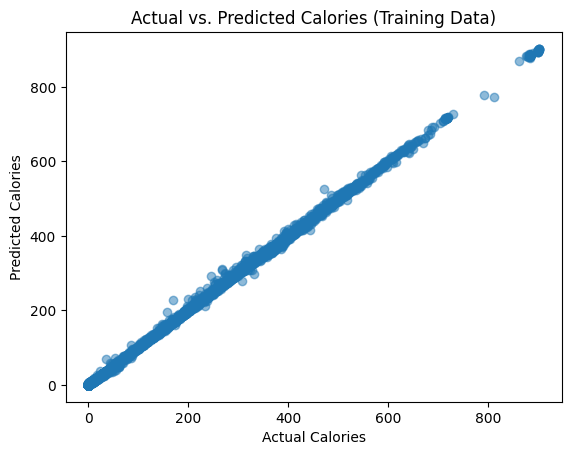

In [31]:
# Predict the calories for the training data
y_train_pred = csv_model.predict(X_train_2)

# Create a scatter plot of the actual vs. predicted calories
plt.scatter(y_train_2, y_train_pred, alpha=0.5)
plt.xlabel("Actual Calories")
plt.ylabel("Predicted Calories")
plt.title("Actual vs. Predicted Calories (Training Data)")
plt.show()

In [3]:
import gradio as gr
import numpy as np
import tensorflow as tf
from PIL import Image
import difflib
import cv2
import re
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import joblib

# Load the pre-trained model
model = tf.keras.models.load_model("food_cnn_model.h5")  # Path to your saved model

# Load the LabelEncoder
label_encoder = joblib.load("label_encoder.pkl")  # Replace with the actual path to the label encoder

# Load the food dataset (nutrition info)
data = pd.read_csv(r'nutrition.csv')

# Function to convert the measurements to numerical values
def convert_measurement(value):
    try:
        value = str(value)
        value = re.sub(r'\s+', '', value)  # Remove extra spaces
        if 'mcg' in value:
            return float(value.replace("mcg", "")) / 1000000
        elif 'mg' in value:
            return float(value.replace("mg", "")) / 1000
        elif 'g' in value:
            return float(value.replace("g", ""))
        elif 'IU' in value:
            return float(value.replace("IU", "")) * 0.025 / 1000000
        else:
            return float(value)
    except ValueError:
        return np.nan

# Process and clean the dataset
columns_to_convert = data.columns[2:]  # All columns except 'name' and 'serving_size'
for column in columns_to_convert:
    data[column] = data[column].apply(convert_measurement)
data = data.dropna()  # Remove rows with missing values

# Function to find the closest matching dish name
def closest_match(dish_name):
    highest_ratio = 0
    best_match = None
    for name in data['name']:
        similarity_ratio = difflib.SequenceMatcher(None, dish_name.lower(), name.lower()).ratio()
        if similarity_ratio > highest_ratio:
            highest_ratio = similarity_ratio
            best_match = name
    return best_match

# Preprocessing function to resize and normalize the image
def preprocess_image(image):
    image = image.resize((64, 64))  # Resize to match the model's input shape
    image_array = np.array(image) / 255.0  # Normalize pixel values
    image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension
    return image_array

# Function to calculate the food area and size
def calculate_food_area_and_size(image):
    image = np.array(image)
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    _, thresh = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    food_area = 0
    for contour in contours:
        food_area += cv2.contourArea(contour)
    
    # Estimate size based on the area
    if food_area < 10000:
        size = 'small'
    elif food_area < 30000:
        size = 'medium'
    else:
        size = 'large'

    return food_area, size

# Function to predict food nutritional values (calories, protein, total fat) scaled by area
def predict_food_nutrition(dish_name, food_area):
    # Find the closest match from the dataset
    closest_dish = closest_match(dish_name)
    if closest_dish:
        dish_data = data[data['name'] == closest_dish]
        calories = dish_data['calories'].values[0] * food_area/300000
        protein = dish_data['protein'].values[0] * food_area/300000
        total_fat = dish_data['total_fat'].values[0] * food_area/300000
        return (f"Calories: {calories:.2f} kcal\n"
                f"Protein: {protein:.2f} g\n"
                f"Total Fat: {total_fat:.2f} g")
    else:
        return "Dish not found in the dataset."

# Main prediction function for Gradio app
def process_image(image):
    # Preprocess image for model prediction
    processed_image = preprocess_image(image)
    prediction = model.predict(processed_image)
    predicted_class_numeric = np.argmax(prediction)  # Numeric prediction
    predicted_class = label_encoder.inverse_transform([predicted_class_numeric])[0]  # Map to class name
    confidence = np.max(prediction)  # Confidence score
    
    # Calculate food area and size
    food_area, size = calculate_food_area_and_size(image)
    
    # Predict nutritional values for the predicted class scaled by area
    nutrition_info = predict_food_nutrition(predicted_class, food_area)
    
    return (f"Predicted Class: {predicted_class} (Confidence: {confidence:.2f})\n"
            f"{nutrition_info}")

# Create the Gradio interface
app = gr.Interface(
    fn=process_image,
    inputs=gr.Image(type="pil"),  # Input image
    outputs="text",  # Output as text
    title="Food Recognition and Nutrition Prediction",
    description="Upload an image of food, and the model will predict its class, area, size, and nutritional information."
)

# Launch the app
app.launch()


C:\Users\Dinesh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:442: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 1.6.1 when using version 1.7.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


* Running on local URL:  http://127.0.0.1:7862
* To create a public link, set `share=True` in `launch()`.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


In [33]:
pip install inference_sdk

Note: you may need to restart the kernel to use updated packages.


In [6]:
import gradio as gr
import cv2
import numpy as np
import matplotlib.pyplot as plt
from inference_sdk import InferenceHTTPClient

# Initialize the client
CLIENT = InferenceHTTPClient(
    api_url="https://detect.roboflow.com",
    api_key="Y10vh3ZwlwXaBpUEcDJ3"
)

def detect_objects(image):
    # Convert image to correct format
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    image_path = "temp_image.jpg"
    cv2.imwrite(image_path, image)
    
    # Perform inference
    result = CLIENT.infer(image_path, model_id="card-deteion/2")
    
    # Convert image back to RGB for display
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Draw bounding boxes
    for prediction in result['predictions']:
        x, y, width, height = (
            int(prediction['x'] - prediction['width'] / 2), 
            int(prediction['y'] - prediction['height'] / 2), 
            int(prediction['width']), 
            int(prediction['height'])
        )
        confidence = prediction['confidence']
        class_name = prediction['class']
        area = width * height
        
        cv2.rectangle(image, (x, y), (x + width, y + height), (0, 255, 0), 2)
        label = f"{class_name} ({confidence:.2f}) | Area: {area}px²"
        cv2.putText(image, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
    
    return image

# Create Gradio Interface
demo = gr.Interface(
    fn=detect_objects,
    inputs=gr.Image(type="numpy"),
    outputs=gr.Image(type="numpy"),
    title="Card Detection App",
    description="Upload an image to detect objects using RoboFlow API."
)

demo.launch()

* Running on local URL:  http://127.0.0.1:7863
* To create a public link, set `share=True` in `launch()`.


In [36]:
pip install transformers

   ---------------------------------------- 0.0/10.0 MB ? eta -:--:--
   --- ------------------------------------ 0.8/10.0 MB 4.2 MB/s eta 0:00:03
   ----- ---------------------------------- 1.3/10.0 MB 2.9 MB/s eta 0:00:03
   ------- -------------------------------- 1.8/10.0 MB 2.6 MB/s eta 0:00:04
   -------- ------------------------------- 2.1/10.0 MB 2.6 MB/s eta 0:00:04
   ---------- ----------------------------- 2.6/10.0 MB 2.5 MB/s eta 0:00:03
   ------------ --------------------------- 3.1/10.0 MB 2.5 MB/s eta 0:00:03
   -------------- ------------------------- 3.7/10.0 MB 2.4 MB/s eta 0:00:03
   --------------- ------------------------ 3.9/10.0 MB 2.4 MB/s eta 0:00:03
   ----------------- ---------------------- 4.5/10.0 MB 2.4 MB/s eta 0:00:03
   ------------------- -------------------- 5.0/10.0 MB 2.4 MB/s eta 0:00:03
   ---------------------- ----------------- 5.5/10.0 MB 2.4 MB/s eta 0:00:02
   ------------------------ --------------- 6.0/10.0 MB 2.4 MB/s eta 0:00:02
   ---

In [48]:
from PIL import Image
import torch
from transformers import AutoImageProcessor, AutoModelForImageClassification

# Load processor and model
processor = AutoImageProcessor.from_pretrained("skylord/swin-finetuned-food101")
model = AutoModelForImageClassification.from_pretrained("skylord/swin-finetuned-food101")

# Load image
image_path = r"C:\Users\nikit\Downloads\foodmain\food dataset\deserts\image_4.jpg"
image = Image.open(image_path).convert("RGB")  # Ensure RGB format

# Preprocess the image
inputs = processor(images=image, return_tensors="pt")

# Perform inference
with torch.no_grad():
    outputs = model(**inputs)

# Extract class prediction
logits = outputs.logits
predicted_class_idx = logits.argmax(-1).item()

# Map index to label
label = model.config.id2label[predicted_class_idx]

# Display result
print(f"Predicted class: {label}")

Predicted class: beignets


In [9]:
import os
import requests
import pandas as pd
from PIL import Image
import torch
from transformers import AutoImageProcessor, AutoModelForImageClassification

# Load processor and model
processor = AutoImageProcessor.from_pretrained("skylord/swin-finetuned-food101")
model = AutoModelForImageClassification.from_pretrained("skylord/swin-finetuned-food101")

def get_nutrition(food_name):
    url = f"https://api.nal.usda.gov/fdc/v1/foods/search?api_key=d4D6dSOc81pTAOY2gsNZ0YhjkMlhStLJRoII5SJu&query={food_name}"
    response = requests.get(url)
    data = response.json()
    if 'foods' not in data or len(data['foods']) == 0:
        return f"No nutrition data found for {food_name}"

    first_food = data['foods'][0]['foodNutrients']
    nutrition_info = {}

    for item in first_food:
        if item['nutrientNumber'] == "203":
            nutrition_info['Protein'] = item['value']
        elif item['nutrientNumber'] == "301":
            nutrition_info['Calcium'] = item['value']
        elif item['nutrientNumber'] == "204":
            nutrition_info['Fat'] = item['value']
        elif item['nutrientNumber'] == "205":
            nutrition_info['Carbohydrates'] = item['value']
        elif item['nutrientNumber'] == "208":  # Energy (calories)
            nutrition_info['Calories'] = item['value']

    return nutrition_info

# Load image
image_path = r"deserts\image_7.jpg"
image = Image.open(image_path).convert("RGB")

# Preprocess the image
inputs = processor(images=image, return_tensors="pt")

# Perform inference
with torch.no_grad():
    outputs = model(**inputs)

# Extract class prediction
logits = outputs.logits
predicted_class_idx = logits.argmax(-1).item()

# Map index to label
label = model.config.id2label[predicted_class_idx]
print(f"Predicted food item: {label}")

# Fetch nutrition data
nutrition_data = get_nutrition(label)
print(f"Nutrition Data: {nutrition_data}")


Predicted food item: baklava
Nutrition Data: No nutrition data found for baklava
